In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
pip install tensorflow

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Activation, Input, GlobalAveragePooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing import image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [6]:
#Datasets splitting 
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

(x_train, y_train), _ = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [7]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

#**Divide this array by something we called it scaling******

In [8]:
x_train/2

array([[[[ 29.5,  31. ,  31.5],
         [ 21.5,  23. ,  22.5],
         [ 25. ,  24. ,  21.5],
         ...,
         [ 79. ,  66. ,  54. ],
         [ 76. ,  62.5,  51. ],
         [ 74. ,  62. ,  51.5]],

        [[  8. ,  10. ,  10. ],
         [  0. ,   0. ,   0. ],
         [  9. ,   4. ,   0. ],
         ...,
         [ 61.5,  44. ,  27.5],
         [ 59.5,  41.5,  25. ],
         [ 61. ,  43.5,  28.5]],

        [[ 12.5,  12. ,  10.5],
         [  8. ,   3.5,   0. ],
         [ 24.5,  13.5,   4. ],
         ...,
         [ 59. ,  42. ,  25. ],
         [ 60. ,  42. ,  25. ],
         [ 54.5,  36.5,  21. ]],

        ...,

        [[104. ,  85. ,  48. ],
         [100.5,  76.5,  17. ],
         [ 99. ,  80.5,  13. ],
         ...,
         [ 80. ,  66.5,  35. ],
         [ 28. ,  15.5,   3.5],
         [ 26.5,  17. ,  10. ]],

        [[ 90. ,  69.5,  48. ],
         [ 86.5,  61.5,  21. ],
         [ 93. ,  72. ,  15. ],
         ...,
         [ 92. ,  74. ,  47. ],
         [ 4

In [12]:
x_train[0].shape

(32, 32, 3)

# Data Visulization

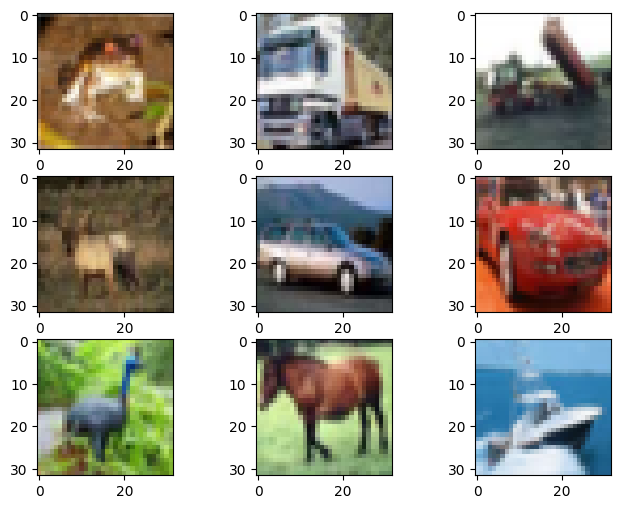

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

#first we make a canvas for visualization
fig = plt.figure(figsize=(8, 6))

for i in range(9):
    #in a canvas there will be 3x3 matrice
    fig.add_subplot(3, 3, i+1)
    plt.imshow(x_train[i])
    
plt.show()

# Draw Neural Network

In [13]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, #we use it to remove all the noise from picture and here 10 means filtering by 10x10 matcrice
                 kernel_size = (3, 3), #this is a dimension
                 
                 strides = (1, 1), #the step that we will jump or ignore. Here we will jump 1 by 1, ignore last row and colums only
                 #strides = (2, 2),
                 padding = "valid" #adding extra padding into main matrice. By default it is valid
                ))

model.output_shape

2023-02-21 17:15:56.218490: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-02-21 17:15:56.218552: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-02-21 17:15:56.218598: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (0c960c34593a): /proc/driver/nvidia/version does not exist
2023-02-21 17:15:56.218963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(None, 30, 30, 10)

In [14]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, #we use it to remove all the noise from picture and here 10 means filtering by 10x10 matcrice
                 kernel_size = (3, 3), #this is a dimension
                 
                 strides = (1, 1), #the step that we will jump or ignore. Here we will jump 1 by 1, ignore last row and colums only
                 #strides = (2, 2),
                 padding = "same" 
                ))

model.output_shape

(None, 32, 32, 10)

In [15]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, #we use it to remove all the noise from picture and here 10 means filtering by 10x10 matcrice
                 kernel_size = (3, 3), #this is a dimension
                 
                 strides = (1, 1), #the step that we will jump or ignore. Here we will jump 1 by 1, ignore last row and colums only
                 #strides = (2, 2),
                 padding = "valid" #adding extra padding into main matrice. By default it is valid
                ))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.output_shape

(None, 15, 15, 10)

In [16]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, #we use it to remove all the noise from picture and here 10 means filtering by 10x10 matcrice
                 kernel_size = (3, 3), #this is a dimension
                 strides = (1, 1), #the step that we will jump or ignore. Here we will jump 1 by 1, ignore last row and colums only
                 padding = "same" 
                ))

model.add(MaxPooling2D(pool_size = (2, 2)))
model.output_shape

(None, 16, 16, 10)

In [17]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, #we use it to remove all the noise from picture and here 10 means filtering by 10x10 matcrice
                 kernel_size = (3, 3), #this is a dimension
                 
                 strides = (1, 1), #the step that we will jump or ignore. Here we will jump 1 by 1, ignore last row and colums only
                 #strides = (2, 2),
                 padding = "valid" 
                ))

model.add(MaxPooling2D(pool_size = (2, 2), padding = "valid"))
model.output_shape

(None, 15, 15, 10)

In [18]:
#the layer we will get , all the layer will be arrange sequentially by using Sequential()
model = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, #we use it to remove all the noise from picture and here 10 means filtering by 10x10 matcrice
                 kernel_size = (3, 3), #this is a dimension
                 
                 strides = (1, 1), #the step that we will jump or ignore. Here we will jump 1 by 1, ignore last row and colums only
                 #strides = (2, 2),
                 padding = "valid" 
                ))

model.add(MaxPooling2D(pool_size = (2, 2), padding = "same"))
model.output_shape

(None, 15, 15, 10)

In [19]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "valid", strides  =(1, 1)))
model.output_shape

(None, 29, 29, 10)

In [20]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "valid", strides  =(2, 2)))
model.output_shape

(None, 15, 15, 10)

In [21]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "same", strides  =(1, 1)))
model.output_shape

(None, 30, 30, 10)

In [22]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "same"
                ))
model.add(MaxPooling2D(pool_size  = (2, 2), padding = "same", strides  =(1, 1)))
model.output_shape

(None, 32, 32, 10)

In [23]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
model.add(GlobalAveragePooling2D()) #ignore all the properties except filtering value
model.output_shape

(None, 10)

In [24]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten()) #converting multi-dimensional data into single dimensional data(FCNN- Fully connected neural network)
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)


In [25]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "same"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)

(None, 32, 32, 10)
(None, 10240)


In [26]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (2, 2),
                 padding = "same"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)

(None, 16, 16, 10)
(None, 2560)


In [27]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (2, 2),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)

(None, 15, 15, 10)
(None, 2250)


In [28]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(10))
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)
(None, 10)


In [29]:
model  = Sequential()
model.add(Conv2D(input_shape = (32, 32, 3),
                 filters =10, 
                 kernel_size = (3, 3),
                 strides = (1, 1),
                 padding = "valid"
                ))
print(model.output_shape)
model.add(Flatten())
print(model.output_shape)
model.add(Dense(2)) #FCNN or dense layer
print(model.output_shape)

(None, 30, 30, 10)
(None, 9000)
(None, 2)
